<a href="https://colab.research.google.com/github/SorayaFrancoLopez/NN_churn_proyect_insurance/blob/main/STEP_2_Feature_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, plotly.express as px, plotly.graph_objects as go
from plotly.subplots import make_subplots
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Estos datos deberan cargarse con el df limpio al que se ha realizado SMOTE
df = pd.read_csv("/content/drive/MyDrive/Churn Rate Algorithm/dfclean.csv", delimiter=',', encoding='latin1')

In [ ]:
#importamos las funciones creadas para analizar los datos
import sys
sys.path.append('/content/drive/MyDrive/Churn Rate Algorithm')
import funciones

In [ ]:
df.head()

,MEDCOD,Edad,AnosCliente,sCodPostal,sNomEstadoCivil,SEXO,TipoPersona,Num_Pol_Vigor_Menos0,NumeRecibos_Menos0,PrimasPagadas_Menos0,...,NumeRecibos_Menos3,PrimasPagadas_Menos3,Num_Siniestros_Menos3,Num_Pol_Vigor_Hogar_Menos3,Num_Pol_Vigor_Autos_Menos3,Num_Pol_Vigor_Decesos_Menos3,Num_Pol_Vigor_Salud_Menos3,Num_Pol_Vigor_PensionesVida_Menos3,Num_Pol_Vigor_Resto_Menos3,EsBaja
0,53,59,16.0,28,1,1,1,1,1,115.98,...,1,112.42,0,0,0,0,0,0,1,0
1,10408,70,5.0,8,2,1,1,2,5,917.17,...,1,139.15,0,0,1,0,0,0,0,0
2,5860,60,6.0,17,1,1,1,1,0,0.00,...,0,0.00,0,0,0,0,0,0,1,0
3,9882,58,5.0,8,2,1,1,1,1,442.17,...,1,392.12,0,0,1,0,0,0,0,0
4,5999,72,6.0,29,4,1,1,0,0,0.00,...,2,426.60,0,0,0,0,0,0,1,1


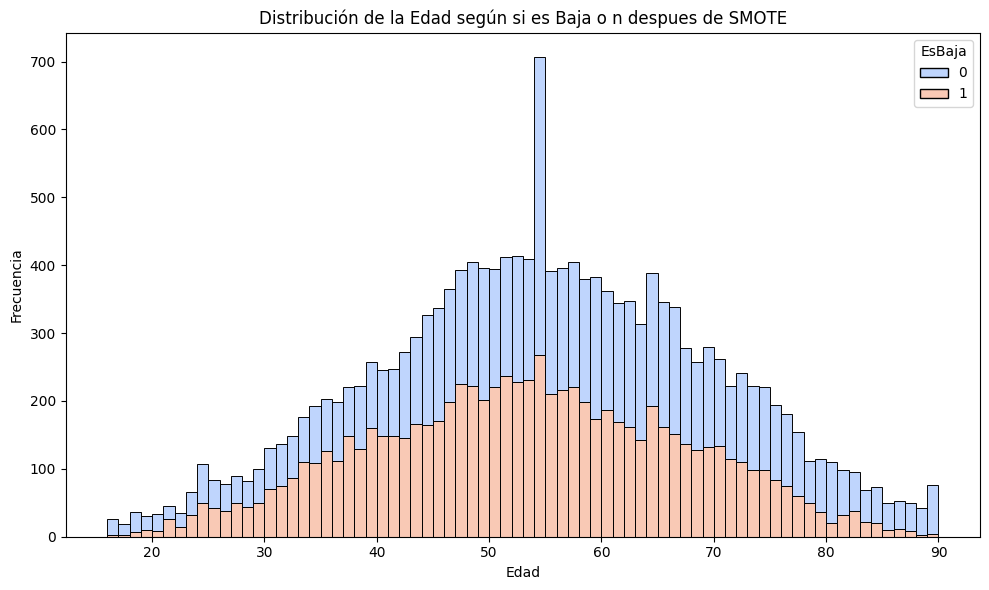

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Edad', bins=74, hue='EsBaja', palette='coolwarm', multiple='stack', edgecolor='black')

plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Edad según si es Baja o n despues de SMOTE')

plt.tight_layout()
plt.show()

###FEATURE IMPORTANCE MEDIANTE TREE DECISION

In [ ]:
X = df.drop(columns=['EsBaja'])  # Variables predictoras
y = df['EsBaja']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split = 100)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=100)

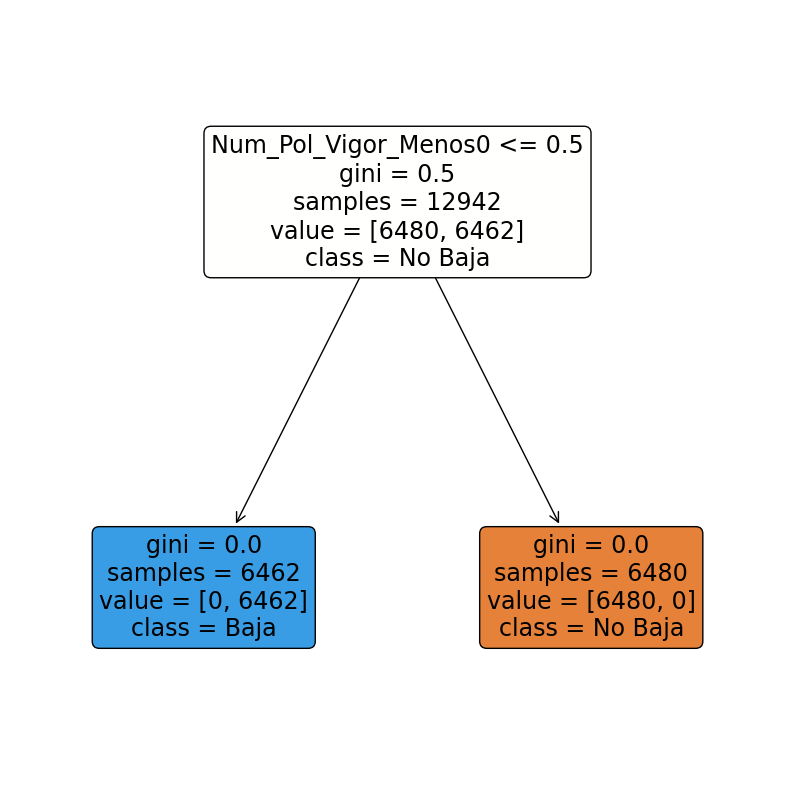

In [ ]:
plt.figure(figsize=(10,10))
plot_tree(tree, feature_names=X.columns, class_names=['No Baja', 'Baja'], filled=True, rounded=True, max_depth=3)
plt.show()

In [ ]:
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
 [[1609    0]
 [   0 1627]]


In [ ]:
# rendimiento
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del árbol de decisión: {accuracy:.2f}")

# Obtén la importancia de las variables
feature_importance = tree.feature_importances_
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance:.4f}")

Precisión del árbol de decisión: 1.00
MEDCOD: 0.0000
Edad: 0.0000
AnosCliente: 0.0000
sCodPostal: 0.0000
sNomEstadoCivil: 0.0000
SEXO: 0.0000
TipoPersona: 0.0000
Num_Pol_Vigor_Menos0: 1.0000
NumeRecibos_Menos0: 0.0000
PrimasPagadas_Menos0: 0.0000
Num_Siniestros_Menos0: 0.0000
Num_Pol_Vigor_Hogar_Menos0: 0.0000
Num_Pol_Vigor_Autos_Menos0: 0.0000
Num_Pol_Vigor_Decesos_Menos0: 0.0000
Num_Pol_Vigor_Salud_Menos0: 0.0000
Num_Pol_Vigor_PensionesVida_Menos0: 0.0000
Num_Pol_Vigor_Resto_Menos0: 0.0000
Num_Pol_Vigor_Menos1: 0.0000
NumeRecibos_Menos1: 0.0000
PrimasPagadas_Menos1: 0.0000
Num_Siniestros_Menos1: 0.0000
Num_Pol_Vigor_Hogar_Menos1: 0.0000
Num_Pol_Vigor_Autos_Menos1: 0.0000
Num_Pol_Vigor_Decesos_Menos1: 0.0000
Num_Pol_Vigor_Salud_Menos1: 0.0000
Num_Pol_Vigor_PensionesVida_Menos1: 0.0000
Num_Pol_Vigor_Resto_Menos1: 0.0000
Num_Pol_Vigor_Menos2: 0.0000
NumeRecibos_Menos2: 0.0000
PrimasPagadas_Menos2: 0.0000
Num_Siniestros_Menos2: 0.0000
Num_Pol_Vigor_Hogar_Menos2: 0.0000
Num_Pol_Vigor_Auto

#ARBOL SEGUNDO

In [ ]:
df = df.drop('Num_Pol_Vigor_Menos0', axis = 1)

In [ ]:
X = df.drop(columns=['EsBaja'])  # Variables predictoras
y = df['EsBaja']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split = 100)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=100)

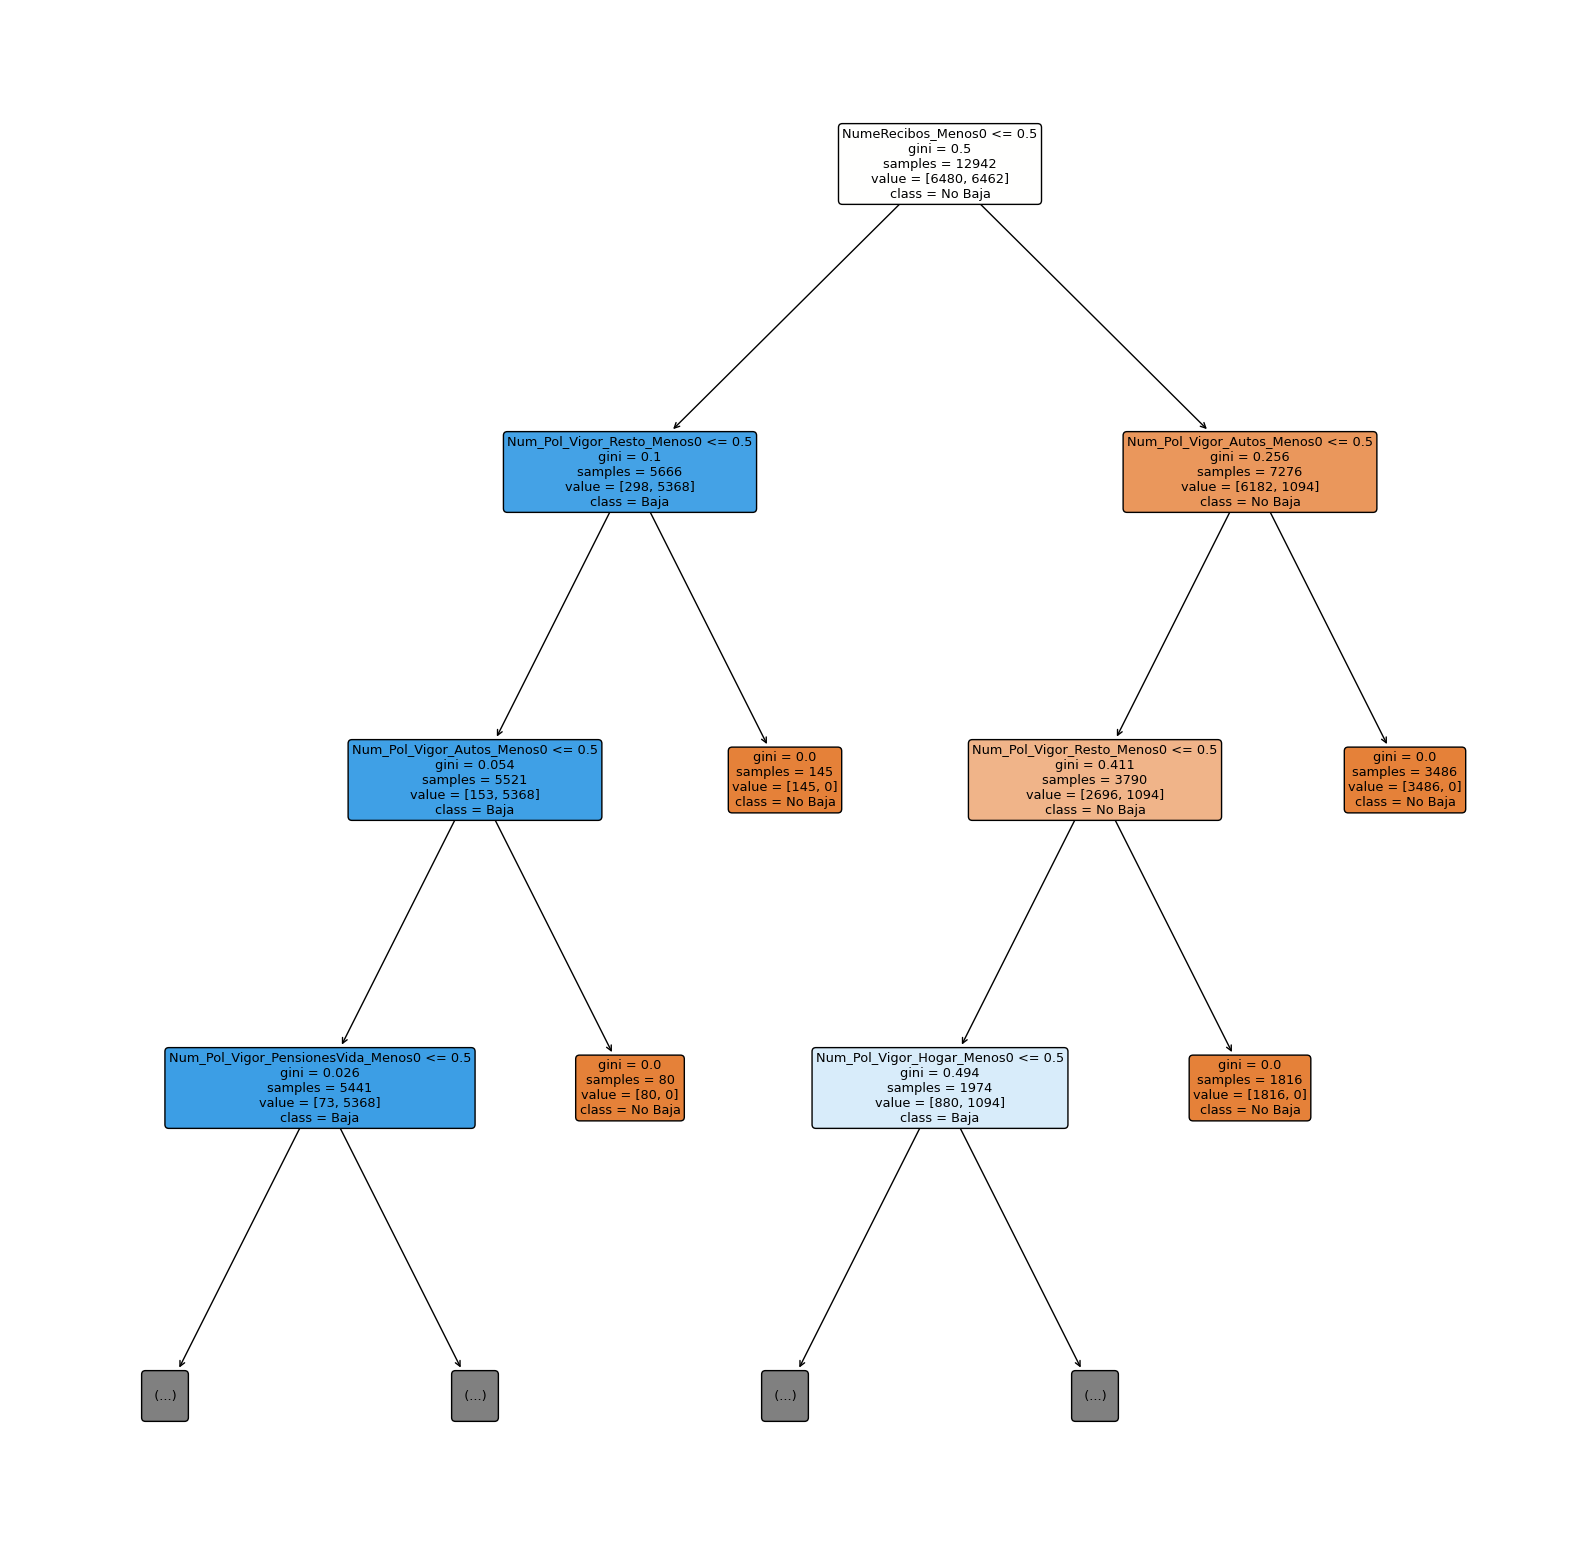

In [ ]:
plt.figure(figsize=(20,20))  # Ajusta el tamaño de la figura según sea necesario
plot_tree(tree, feature_names=X.columns, class_names=['No Baja', 'Baja'], filled=True, rounded=True, max_depth=3)
plt.show()

In [ ]:
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9669344870210136
Precision: 0.9382929642445214
Recall: 1.0
F1-score: 0.9681642368342755
Confusion Matrix:
 [[1502  107]
 [   0 1627]]


In [ ]:
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del árbol de decisión: {accuracy:.2f}")

# importancia de las variables
feature_importance = tree.feature_importances_
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance:.4f}")

Precisión del árbol de decisión: 0.97
MEDCOD: 0.0000
Edad: 0.0000
AnosCliente: 0.0000
sCodPostal: 0.0000
sNomEstadoCivil: 0.0000
SEXO: 0.0000
TipoPersona: 0.0000
NumeRecibos_Menos0: 0.6871
PrimasPagadas_Menos0: 0.0000
Num_Siniestros_Menos0: 0.0000
Num_Pol_Vigor_Hogar_Menos0: 0.0815
Num_Pol_Vigor_Autos_Menos0: 0.0774
Num_Pol_Vigor_Decesos_Menos0: 0.0000
Num_Pol_Vigor_Salud_Menos0: 0.0000
Num_Pol_Vigor_PensionesVida_Menos0: 0.0100
Num_Pol_Vigor_Resto_Menos0: 0.1440
Num_Pol_Vigor_Menos1: 0.0000
NumeRecibos_Menos1: 0.0000
PrimasPagadas_Menos1: 0.0000
Num_Siniestros_Menos1: 0.0000
Num_Pol_Vigor_Hogar_Menos1: 0.0000
Num_Pol_Vigor_Autos_Menos1: 0.0000
Num_Pol_Vigor_Decesos_Menos1: 0.0000
Num_Pol_Vigor_Salud_Menos1: 0.0000
Num_Pol_Vigor_PensionesVida_Menos1: 0.0000
Num_Pol_Vigor_Resto_Menos1: 0.0000
Num_Pol_Vigor_Menos2: 0.0000
NumeRecibos_Menos2: 0.0000
PrimasPagadas_Menos2: 0.0000
Num_Siniestros_Menos2: 0.0000
Num_Pol_Vigor_Hogar_Menos2: 0.0000
Num_Pol_Vigor_Autos_Menos2: 0.0000
Num_Pol_Vigo

#ARBOL TERCERO

In [ ]:
columnas_eliminar = ['Num_Pol_Vigor_Resto_Menos0', 'NumeRecibos_Menos0','PrimasPagadas_Menos0', 'Num_Pol_Vigor_Hogar_Menos0', 'Num_Pol_Vigor_Autos_Menos0', 'Num_Pol_Vigor_Decesos_Menos0', 'Num_Pol_Vigor_Salud_Menos0', 'Num_Pol_Vigor_PensionesVida_Menos0']
df = df.drop(columnas_eliminar, axis =1)

In [ ]:
X = df.drop(columns=['EsBaja'])  # Variables predictoras
y = df['EsBaja']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split = 100)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=100)

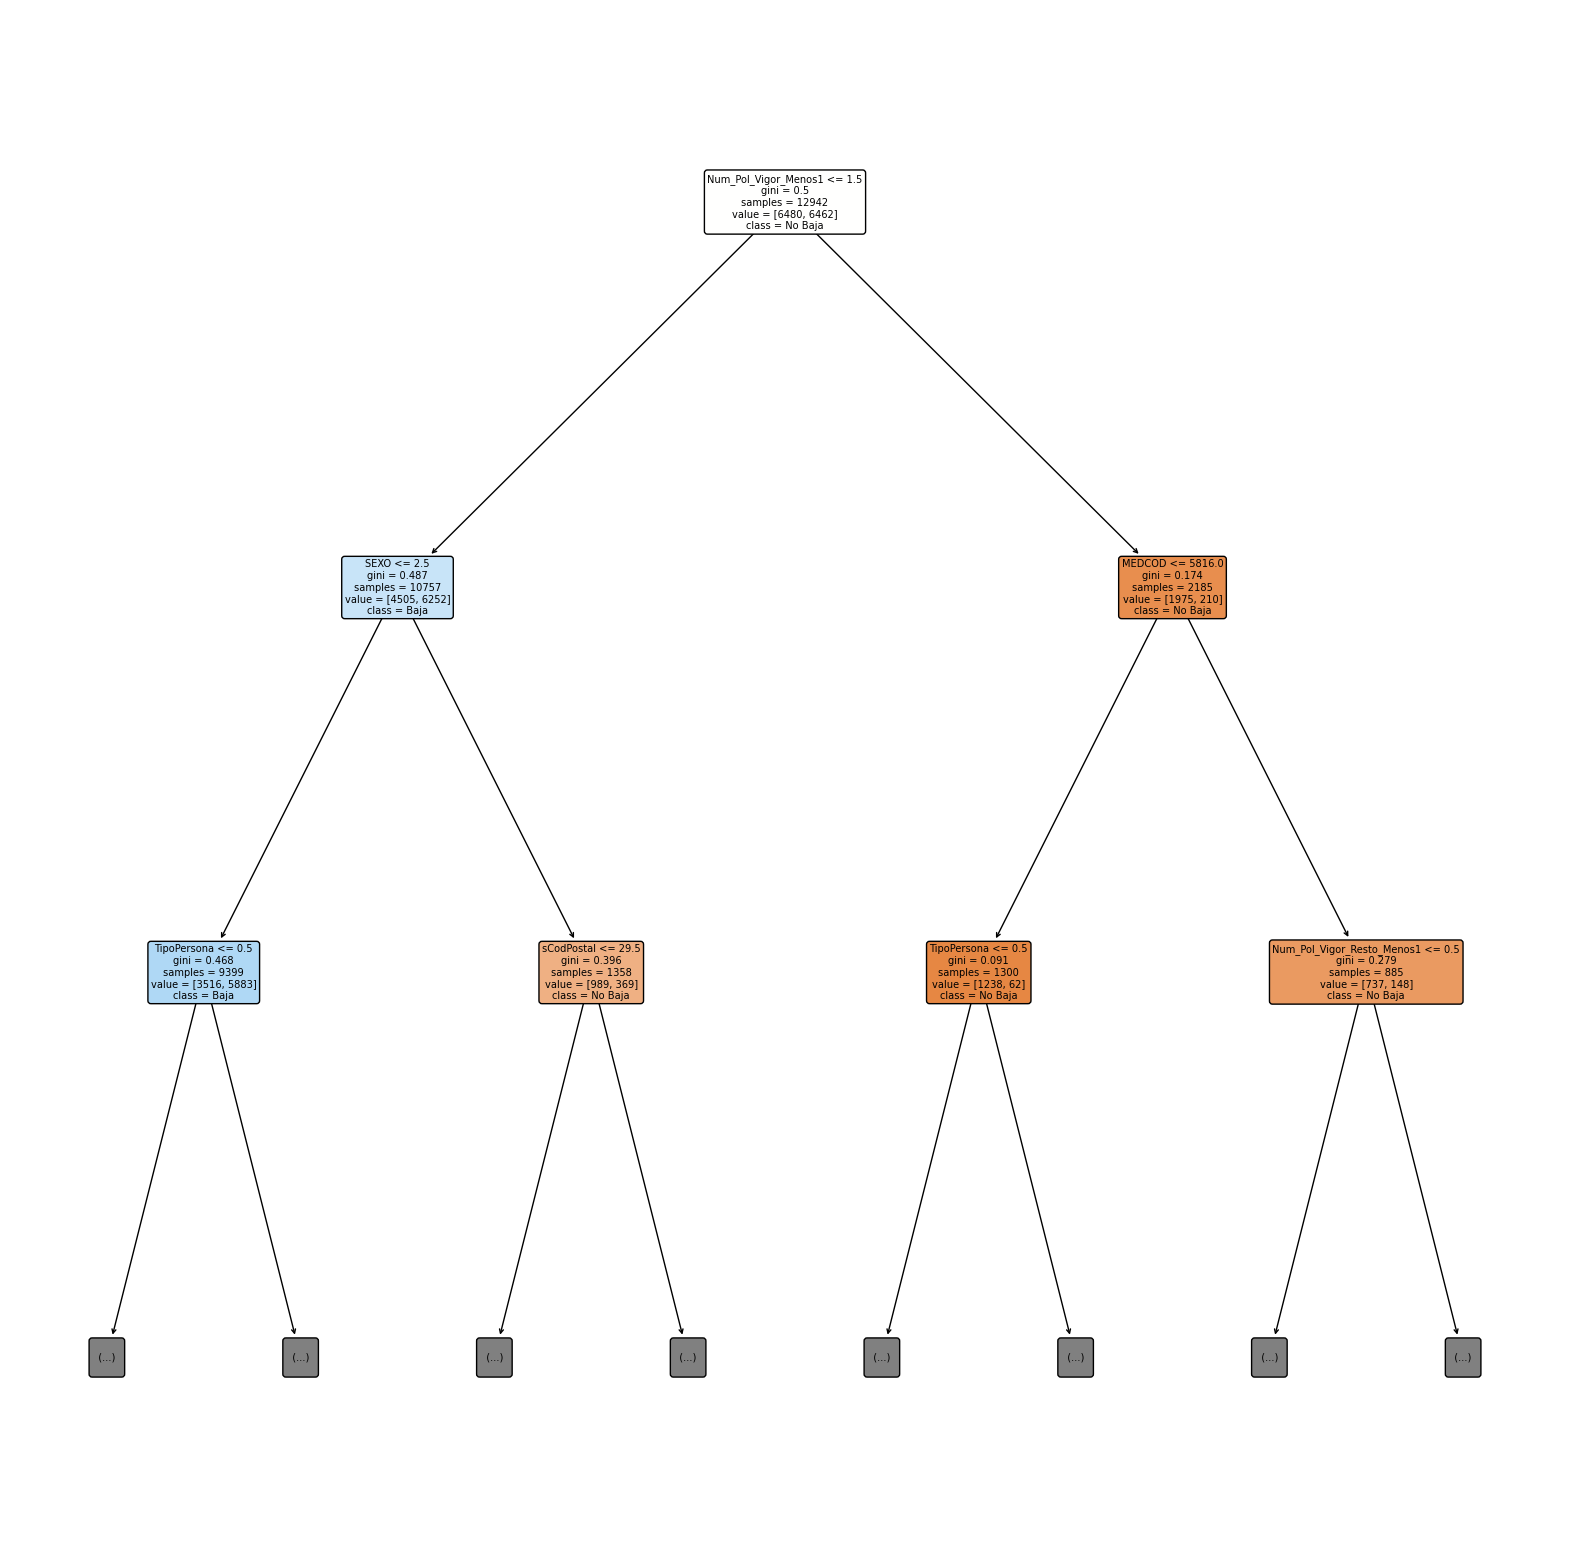

In [ ]:
plt.figure(figsize=(20,20))
plot_tree(tree, feature_names=X.columns, class_names=['No Baja', 'Baja'], filled=True, rounded=True, max_depth=2)
plt.show()

In [ ]:
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7166254635352287
Precision: 0.6923076923076923
Recall: 0.7854947756607252
F1-score: 0.7359631442556868
Confusion Matrix:
 [[1041  568]
 [ 349 1278]]


In [ ]:
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del árbol de decisión: {accuracy:.2f}")

# Obtén la importancia de las variables
feature_importance = tree.feature_importances_
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance:.4f}")

Precisión del árbol de decisión: 0.72
MEDCOD: 0.0096
Edad: 0.0000
AnosCliente: 0.0000
sCodPostal: 0.0308
sNomEstadoCivil: 0.0000
SEXO: 0.2872
TipoPersona: 0.1268
Num_Siniestros_Menos0: 0.0000
Num_Pol_Vigor_Menos1: 0.4882
NumeRecibos_Menos1: 0.0000
PrimasPagadas_Menos1: 0.0034
Num_Siniestros_Menos1: 0.0000
Num_Pol_Vigor_Hogar_Menos1: 0.0000
Num_Pol_Vigor_Autos_Menos1: 0.0000
Num_Pol_Vigor_Decesos_Menos1: 0.0000
Num_Pol_Vigor_Salud_Menos1: 0.0000
Num_Pol_Vigor_PensionesVida_Menos1: 0.0000
Num_Pol_Vigor_Resto_Menos1: 0.0147
Num_Pol_Vigor_Menos2: 0.0000
NumeRecibos_Menos2: 0.0000
PrimasPagadas_Menos2: 0.0271
Num_Siniestros_Menos2: 0.0000
Num_Pol_Vigor_Hogar_Menos2: 0.0122
Num_Pol_Vigor_Autos_Menos2: 0.0000
Num_Pol_Vigor_Decesos_Menos2: 0.0000
Num_Pol_Vigor_Salud_Menos2: 0.0000
Num_Pol_Vigor_PensionesVida_Menos2: 0.0000
Num_Pol_Vigor_Resto_Menos2: 0.0000
Num_Pol_Vigor_Menos3: 0.0000
NumeRecibos_Menos3: 0.0000
PrimasPagadas_Menos3: 0.0000
Num_Siniestros_Menos3: 0.0000
Num_Pol_Vigor_Hogar_Men

In [ ]:
#Feature importance odenado
feature_importance = tree.feature_importances_
importance_sorted = sorted(zip(X.columns, feature_importance), key=lambda x: x[1], reverse=True)
for feature, importance in importance_sorted:
    print(f"{feature}: {importance:.4f}")

Num_Pol_Vigor_Menos1: 0.4882
SEXO: 0.2872
TipoPersona: 0.1268
sCodPostal: 0.0308
PrimasPagadas_Menos2: 0.0271
Num_Pol_Vigor_Resto_Menos1: 0.0147
Num_Pol_Vigor_Hogar_Menos2: 0.0122
MEDCOD: 0.0096
PrimasPagadas_Menos1: 0.0034
Edad: 0.0000
AnosCliente: 0.0000
sNomEstadoCivil: 0.0000
Num_Siniestros_Menos0: 0.0000
NumeRecibos_Menos1: 0.0000
Num_Siniestros_Menos1: 0.0000
Num_Pol_Vigor_Hogar_Menos1: 0.0000
Num_Pol_Vigor_Autos_Menos1: 0.0000
Num_Pol_Vigor_Decesos_Menos1: 0.0000
Num_Pol_Vigor_Salud_Menos1: 0.0000
Num_Pol_Vigor_PensionesVida_Menos1: 0.0000
Num_Pol_Vigor_Menos2: 0.0000
NumeRecibos_Menos2: 0.0000
Num_Siniestros_Menos2: 0.0000
Num_Pol_Vigor_Autos_Menos2: 0.0000
Num_Pol_Vigor_Decesos_Menos2: 0.0000
Num_Pol_Vigor_Salud_Menos2: 0.0000
Num_Pol_Vigor_PensionesVida_Menos2: 0.0000
Num_Pol_Vigor_Resto_Menos2: 0.0000
Num_Pol_Vigor_Menos3: 0.0000
NumeRecibos_Menos3: 0.0000
PrimasPagadas_Menos3: 0.0000
Num_Siniestros_Menos3: 0.0000
Num_Pol_Vigor_Hogar_Menos3: 0.0000
Num_Pol_Vigor_Autos_Menos3

In [ ]:
feature_importance_dict = {
    'Num_Pol_Vigor_Menos1': 0.4882,
    'SEXO': 0.2872,
    'TipoPersona': 0.1268,
    'sCodPostal': 0.0308,
    'PrimasPagadas_Menos2': 0.0271,
    'Num_Pol_Vigor_Resto_Menos1': 0.0147,
    'Num_Pol_Vigor_Hogar_Menos2': 0.0122,
    'MEDCOD': 0.0096,
    'PrimasPagadas_Menos1': 0.0034
}

In [ ]:
feature_importance_dict

{'Num_Pol_Vigor_Menos1': 0.4882,
 'SEXO': 0.2872,
 'TipoPersona': 0.1268,
 'sCodPostal': 0.0308,
 'PrimasPagadas_Menos2': 0.0271,
 'Num_Pol_Vigor_Resto_Menos1': 0.0147,
 'Num_Pol_Vigor_Hogar_Menos2': 0.0122,
 'MEDCOD': 0.0096,
 'PrimasPagadas_Menos1': 0.0034}

regresion logistica

In [ ]:
selected_columns = list(feature_importance_dict.keys()) + ['EsBaja']
df = df.loc[:, selected_columns]

In [ ]:
df.shape

(16178, 10)

In [ ]:
# Definir las características (X) y la variable objetivo (y)
X = df.drop(columns=['EsBaja'])
y = df['EsBaja']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Imprimir el informe de clasificación
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7058096415327565
Confusion Matrix:
[[1021  588]
 [ 364 1263]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.63      0.68      1609
           1       0.68      0.78      0.73      1627

    accuracy                           0.71      3236
   macro avg       0.71      0.71      0.70      3236
weighted avg       0.71      0.71      0.70      3236



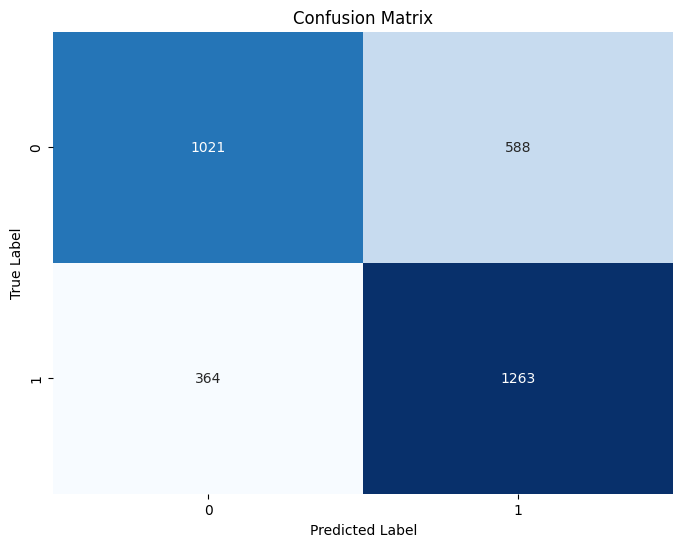

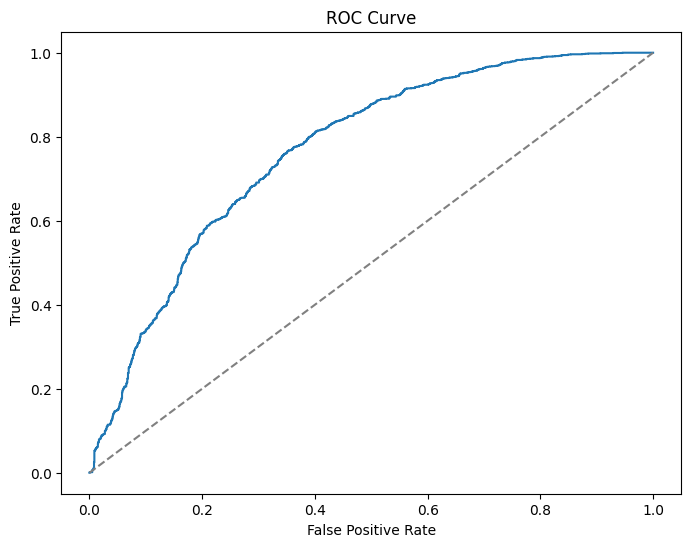

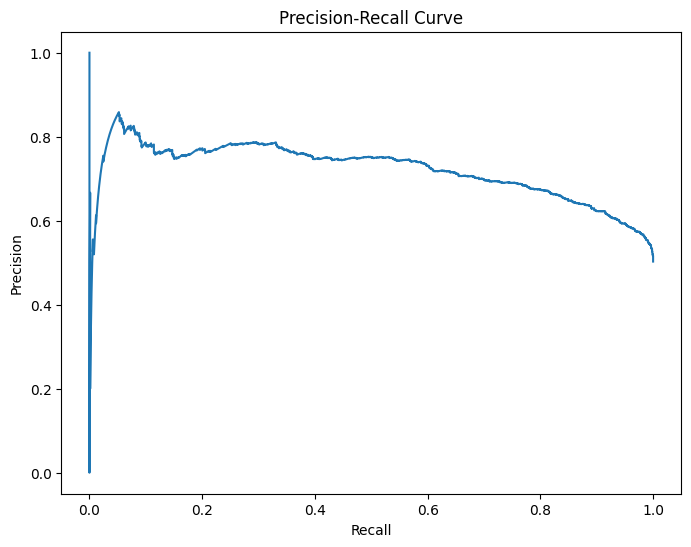

In [ ]:
# Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Curva ROC
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Curva de Precisión-Recall
plt.figure(figsize=(8, 6))
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
